In [1]:
import tensorflow as tf
from tensorflow import keras
print("tensorflow version",tf.__version__)
print("keras version",keras.__version__)

tensorflow version 2.0.0
keras version 2.2.4-tf


Download Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


Extract the validation set

In [3]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]
print(y_train)

[4 0 7 ... 3 0 5]


#Define categorical class

In [4]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
print(y_train[0])
print(class_names[y_train[0]])

4
Coat


create the model

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [6]:
#verifying data

In [7]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
print(weights.shape)
print(biases.shape)
print(biases)
print(weights)

(784, 300)
(300,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[-0.04129287 -0.01459103 -0.02500915 ...  0.06572992  0.02533278
  

#train the model

In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train,y_train, epochs =10, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 4s 66us/sample - loss: 0.7254 - accuracy: 0.7638 - val_loss: 0.5008 - val_accuracy: 0.8306
Epoch 2/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.4909 - accuracy: 0.8292 - val_loss: 0.4337 - val_accuracy: 0.8554
Epoch 3/10
55000/55000 [==============================] - 3s 57us/sample - loss: 0.4439 - accuracy: 0.8448 - val_loss: 0.4105 - val_accuracy: 0.8592
Epoch 4/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.4158 - accuracy: 0.8549 - val_loss: 0.4005 - val_accuracy: 0.8644
Epoch 5/10
55000/55000 [==============================] - 3s 56us/sample - loss: 0.3952 - accuracy: 0.8603 - val_loss: 0.3818 - val_accuracy: 0.8680
Epoch 6/10
55000/55000 [==============================] - 3s 58us/sample - loss: 0.3785 - accuracy: 0.8679 - val_loss: 0.3732 - val_accuracy: 0.8690
Epoch 7/10
55000/55000 [==============================] -

Plot the traing loass and accuracy

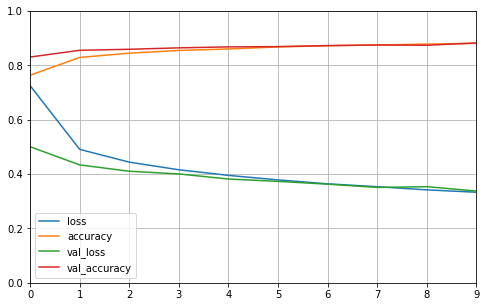

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
hist = pd.DataFrame.from_dict(history.history)
hist.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()